# 1. Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pickle
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

# 2. load data

In [2]:
#courses
classes = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\Data\unicef_afrilearn\reunicefdata\new data\courses.csv")

In [3]:
classes.head()

,_id,name,alias,imageUrl,categoryId,createdAt,updatedAt,__v,enrollee
0,5fc8cfbb81a55b4c3c19737d,Primary One,Primary One,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-03T11:45:00.148Z,2021-03-24T11:27:23.867Z,0,4.0
1,5fd12c70e74b15663c5f4c6e,Primary Two,Primary two,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:48:51.389Z,0,4.0
2,5fff5a67de0bdb47f826fea8,Primary Three,Primary Three,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-03-24T11:34:37.412Z,0,4.0
3,5fff5a7ede0bdb47f826fea9,Primary Four,Primary Four,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:49:03.635Z,0,4.0
4,5fff5aaede0bdb47f826feaa,Primary Five,Primary Five,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:49:19.997Z,0,4.0


In [4]:
classes[['name','enrollee']].groupby(by=['name']).sum()

,enrollee
name,
Afrilearn Kids Code,0.0
JSS One,4.0
JSS Three,4.0
JSS Two,4.0
Primary Five,4.0
Primary Four,4.0
Primary One,4.0
Primary Six,4.0
Primary Three,4.0


In [5]:
classes['name'].unique() # The classes represent all the student's levels from Primary One to SS3"

array(['Primary One', 'Primary Two', 'Primary Three', 'Primary Four',
       'Primary Five', 'Primary Six', 'JSS One', 'JSS Two', 'JSS Three',
       'SSS One', 'SSS Two', 'SSS Three', 'Afrilearn Kids Code'],
      dtype=object)

In [6]:
classes['_id'].unique()

array(['5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5a7ede0bdb47f826fea9',
       '5fff5aaede0bdb47f826feaa', '5fff5abede0bdb47f826feab',
       '5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '629dbb4c5a5f270016033712'], dtype=object)

In [8]:
#lessons
lessons = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\Data\unicef_afrilearn\reunicefdata\new data\lessons.csv")

In [9]:
lessons.head()

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0


In [10]:
lessons['termId'].nunique()

3

In [11]:
lessons['subjectId'].nunique()

160

In [12]:
lessons['title'].nunique()

3489

In [13]:
lessons.videoUrls[0]

'[{"_id":{"$oid":"61599bbe0d83c53834563589"},"transcript":"<p>Transcript</p>","videoUrl":"https://youtu.be/St53lTNJyVc"},{"_id":{"$oid":"615b2916edb75e5158c1765a"},"transcript":"<p>https://youtu.be/X2H1Ilg4RWYhttps://youtu.be/X2H1Ilg4RWY<br></p>","videoUrl":"https://youtu.be/X2H1Ilg4RWY"}]'

In [15]:
lessons['videourl']=lessons['videoUrls'].str.split('"videoUrl":',expand=True)[1]

In [16]:
lessons['videourl']=lessons['videourl'].str.split(',"transcript":',expand=True)[0]

In [17]:
lessons['videourl']=lessons['videourl'].str.split('}',expand=True)[0]

In [18]:
lessons['videourl'].value_counts()

"https://youtu.be/15NIoz4B5O4"                                                                                                                                                                                            162
"https://youtu.be/_o7kVrBRbfY"                                                                                                                                                                                              2
"https://youtu.be/ECK3pqjgiKs"                                                                                                                                                                                              2
"https://youtu.be/5B2zGJBi6gI"                                                                                                                                                                                              2
"https://youtu.be/oIv_pLL68cw"                                                                                  

In [19]:
lessons.content[0]

'<p>Back to: <a class="on">Agricultural Science Primary 1</a></p><p>Welcome to class.</p><p>\\\\n</p><p>Farm tools are tools used on the farm to carry out farming activities. Farm tools are simple or modern farm tools.</p><p>\\\\n</p><p><strong>TYPES OF SIMPLE FARM TOOLS AND THEIR USES</strong></p><p>\\\\n</p><ul>\\\\n<li>Cultlass</li>\\\\n</ul><p>\\\\n</p><div class="se-component se-image-container __se__float-none" contenteditable="false"><figure style="margin: 0px;"><img alt="" data-proportion="true" data-align="none" data-file-name="" data-file-size="0" data-origin="," data-size="," data-rotate="" data-percentage="auto,auto" data-index="0" data-rotatex="" data-rotatey="" style=""></figure></div><p>\\\\n</p><p><strong>USES</strong></p><p>\\\\n</p><ol>\\\\n<li>It is used for cutting wood.</li>\\\\n<li>It is used for digging holes.</li>\\\\n</ol><p>\\\\n</p><ul>\\\\n<li>Hoe</li>\\\\n</ul><p>\\\\n</p><div class="se-component se-image-container __se__float-none" contenteditable="false">

In [21]:
lesson_df = lessons[['_id','views','subjectId','courseId','termId','title','content','videourl']]

In [22]:
#main subject description
mainsubjects = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\Data\unicef_afrilearn\reunicefdata\new data\mainsubjects.csv")

In [23]:
mainsubjects.head(10)

,_id,name,introText,classification,imageUrl,createdAt,updatedAt,__v
0,5fca6b75724ea10be8d7118b,English,"In this Class, you will learn all English Lang...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
1,5fca6ba720ae17154494ce76,Mathematics,"In this Class, you will learn all Mathematics ...",Calculation,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:02:31.260Z,2020-12-04T17:02:31.260Z,0
2,5ffef619de0bdb47f826fea2,Basic Technology,"In this Class, you will learn all Basic Techno...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
3,5ffef6c2de0bdb47f826fea3,Basic Science,"In this Class, you will learn all Basic Scienc...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
4,5ffef6e2de0bdb47f826fea4,Social Studies,"In this Class, get all Social Study topics fr...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
5,5ffef6f2de0bdb47f826fea5,Business Studies,"In this Class, you will learn all Business Stu...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
6,5ffef70cde0bdb47f826fea6,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
7,5ffef71ade0bdb47f826fea7,Civic Education,"In this Class, you will learn all Civic Educat...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
8,60115b97f05815325d1a9dfb,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
9,60115c82f05815325d1a9dfc,Christian Religious Study,"In this Class, you will learn all Christian Re...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0


In [24]:
mainsubjects['name'].nunique()

30

In [25]:
mainsubjects['_id'].nunique()

30

In [26]:
#subjects
subjects = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\Data\unicef_afrilearn\reunicefdata\new data\subjects.csv")

In [27]:
subjects.head(10)

,_id,mainSubjectId,courseId,__v
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,0
1,5fff5c253fd2d54b08047c83,5ffef619de0bdb47f826fea2,5fc8cfbb81a55b4c3c19737d,0
2,5fff5c313fd2d54b08047c84,60115c82f05815325d1a9dfc,5fc8cfbb81a55b4c3c19737d,0
3,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,0
4,5fff5c553fd2d54b08047c86,60115cccf05815325d1a9dfe,5fc8cfbb81a55b4c3c19737d,0
5,5fff5c683fd2d54b08047c87,5fca6b75724ea10be8d7118b,5fc8cfbb81a55b4c3c19737d,0
6,5fff5c753fd2d54b08047c88,60115d23f05815325d1a9dff,5fc8cfbb81a55b4c3c19737d,0
7,5fff5c883fd2d54b08047c89,5fca6ba720ae17154494ce76,5fc8cfbb81a55b4c3c19737d,0
8,5fff5ca23fd2d54b08047c8a,5ffef6e2de0bdb47f826fea4,5fc8cfbb81a55b4c3c19737d,0
9,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,0


### combining subjects, main subjects and classes names

In [28]:
df = subjects.merge(mainsubjects[['_id','name']],left_on=['mainSubjectId'],right_on=['_id'],how='inner')

In [29]:
df = df.drop(['_id_y','__v'],axis=1)

In [30]:
df = df.rename(columns={'_id_x':'subjectId'})

In [31]:
df = df.merge(classes[['_id','name']],left_on=['courseId'],right_on=['_id'],how='inner')

In [32]:
df = df.drop(['_id'],axis=1)

In [33]:
df = df.rename(columns={'name_x':'subject_name','name_y':'class_name'})

In [34]:
df.head()

,subjectId,mainSubjectId,courseId,subject_name,class_name
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One
1,5fff5c253fd2d54b08047c83,5ffef619de0bdb47f826fea2,5fc8cfbb81a55b4c3c19737d,Basic Technology,Primary One
2,5fff5c313fd2d54b08047c84,60115c82f05815325d1a9dfc,5fc8cfbb81a55b4c3c19737d,Christian Religious Study,Primary One
3,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One
4,5fff5c553fd2d54b08047c86,60115cccf05815325d1a9dfe,5fc8cfbb81a55b4c3c19737d,Creative Cultural Arts,Primary One


In [35]:
#df.to_csv("lesson_database.csv")

In [36]:
df = df.merge(lesson_df,left_on=['subjectId','courseId'],right_on=['subjectId','courseId'],how='right')

In [37]:
df = df.rename(columns={'_id':'lessonId'})

In [38]:
df.head()

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,title,content,videourl
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc"""
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9e,21.0,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,None
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,None
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea2,1.0,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,None
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea4,NaN,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,None


# Recent Activities

#### The recent activities table tells us what the students recently viewed.

In [43]:
#recentactivities
recent_activities = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\Data\unicef_afrilearn\reunicefdata\recentactivities.csv")

In [44]:
recent_activities.head(10)

,_id,lessonId,type,userId,createdAt,updatedAt,__v
0,609a3909f3e4905f0001f3de,6012d1b0cfe09249249f8954,lesson,6096464f42cd50554895e250,2021-05-11T07:58:01.630Z,2021-05-11T07:58:01.630Z,0
1,609a3a8bf3e4905f0001f3e0,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:04:27.541Z,2021-05-11T08:04:27.541Z,0
2,609a4259f3e4905f0001f3e2,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:37:45.403Z,2021-05-11T08:37:45.403Z,0
3,609a42dff3e4905f0001f3e5,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.882Z,2021-05-11T08:39:59.882Z,0
4,609a42dff3e4905f0001f3e6,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.896Z,2021-05-11T08:39:59.896Z,0
5,609a43b6f3e4905f0001f3e9,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:43:34.752Z,2021-05-11T08:43:34.752Z,0
6,609a44dff3e4905f0001f3eb,6012cec2cfe09249249f88fe,lesson,603fdf31a36c060015655272,2021-05-11T08:48:31.517Z,2021-05-11T08:48:31.517Z,0
7,609a44e8f3e4905f0001f3ec,6012cec2cfe09249249f88fe,lesson,603fdf31a36c060015655272,2021-05-11T08:48:40.838Z,2021-05-11T08:48:40.838Z,0
8,609a4608f3e4905f0001f3ef,6012d293cfe09249249f89bc,lesson,603fdf31a36c060015655272,2021-05-11T08:53:28.177Z,2021-05-11T08:53:28.177Z,0
9,609a460df3e4905f0001f3f1,6012d293cfe09249249f89bc,lesson,603fdf31a36c060015655272,2021-05-11T08:53:33.537Z,2021-05-11T08:53:33.537Z,0


In [45]:
recent_activities.userId.nunique()

2445

In [46]:
len(df)

3737

In [47]:
df = df.merge(recent_activities[['lessonId','userId']],left_on='lessonId',right_on='lessonId',how='left')

In [48]:
df[df.userId.isna()]

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,title,content,videourl,userId
209,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea4,NaN,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,None,NaN
213,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea6,NaN,5fc8d1b20fae0a06bc22db5c,Enemies Of Farmers (Rodent & Birds),"<span style=""font-size: 16px;"">Welcome to clas...",None,NaN
261,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ec0,NaN,600048197cabf80f88f61736,Land And Its Types,Welcome to class.\r\n\r\nLand is the part of t...,None,NaN
262,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ec2,NaN,600048197cabf80f88f61736,Uses and Importance of Land,Welcome to class.\r\n\r\nThere are various use...,None,NaN
263,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ec6,NaN,600048197cabf80f88f61736,Modern Farm Tools,Welcome to class.\r\n\r\nModern farm tools are...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22347,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08b540b99530016d3474e,0.0,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...","""https://youtu.be/F3PTnLw7zPY""",NaN
22348,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08d730b99530016d3475b,0.0,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...","""https://youtu.be/Cmicy4sgSzc""",NaN
22349,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08ea70b99530016d34768,0.0,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...","""https://youtu.be/B9y0ab3Ow9Y""",NaN
22350,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a094e10b99530016d3478a,0.0,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...","""https://youtu.be/YAXeSwvFxbI""",NaN


#### assign a random userId to all lessons

In [49]:
import string
import random

In [50]:
df['userId'] = df['userId'].apply(lambda x: ''.join(random.choice(string.ascii_lowercase) for i in range(24)) if x!=x else x)

In [51]:
school_level = df.courseId.unique()
school_level

array(['5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5a7ede0bdb47f826fea9',
       '5fff5aaede0bdb47f826feaa', '5fff5abede0bdb47f826feab',
       '5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '629dbb4c5a5f270016033712'], dtype=object)

In [61]:
# Introduction = number of class name, number of subjects per course level, 
# Total number of views
# Total number per class, per course
# Check on student performance on quizzes
# Report on accuracy tests - literature survey

In [52]:
df[df.class_name.isna()]

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,title,content,videourl,userId
4945,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cec6cfe09249249f890a,1.0,600047f67cabf80f88f61735,Classes and Uses of Farm Animals,"<p>Welcome to class!</p><p>In today’s class, w...",None,6096464f42cd50554895e250
4946,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cec6cfe09249249f890a,1.0,600047f67cabf80f88f61735,Classes and Uses of Farm Animals,"<p>Welcome to class!</p><p>In today’s class, w...",None,603fdf31a36c060015655272
4968,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f8918,3.0,600048197cabf80f88f61736,Factors of Production: Entrepreneur,<p><em><strong>Welcome to class!</strong></em>...,"""https://afrilearn-media.s3.eu-west-3.amazonaw...",603fdf31a36c060015655272
4969,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f8918,3.0,600048197cabf80f88f61736,Factors of Production: Entrepreneur,<p><em><strong>Welcome to class!</strong></em>...,"""https://afrilearn-media.s3.eu-west-3.amazonaw...",603fdf31a36c060015655272
4970,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f8918,3.0,600048197cabf80f88f61736,Factors of Production: Entrepreneur,<p><em><strong>Welcome to class!</strong></em>...,"""https://afrilearn-media.s3.eu-west-3.amazonaw...",603fdf31a36c060015655272
4971,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f8918,3.0,600048197cabf80f88f61736,Factors of Production: Entrepreneur,<p><em><strong>Welcome to class!</strong></em>...,"""https://afrilearn-media.s3.eu-west-3.amazonaw...",6082a7a53926fe29c8c7f703
4972,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f8918,3.0,600048197cabf80f88f61736,Factors of Production: Entrepreneur,<p><em><strong>Welcome to class!</strong></em>...,"""https://afrilearn-media.s3.eu-west-3.amazonaw...",603fdf31a36c060015655272
4973,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f891a,1.0,600048197cabf80f88f61736,Factors of Production: LAND,<p><em><strong>Welcome to class!</strong></em>...,None,603fdf31a36c060015655272
4974,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f891a,1.0,600048197cabf80f88f61736,Factors of Production: LAND,<p><em><strong>Welcome to class!</strong></em>...,None,603fdf31a36c060015655272
4975,60115b97f05815325d1a9dfb,NaN,5fff72b3de0bdb47f826feaf,NaN,NaN,6012cecacfe09249249f891a,1.0,600048197cabf80f88f61736,Factors of Production: LAND,<p><em><strong>Welcome to class!</strong></em>...,None,603fdf31a36c060015655272


In [53]:
df = df.dropna(subset=['class_name','subject_name'])

In [54]:
school_levels = df.class_name.unique()

In [55]:
school_levels

array(['Primary One', 'Primary Two', 'Primary Three', 'Primary Four',
       'Primary Five', 'Primary Six', 'JSS One', 'JSS Two', 'JSS Three',
       'SSS One', 'SSS Two', 'SSS Three', 'Afrilearn Kids Code'],
      dtype=object)

In [56]:
len(school_levels)

13

In [57]:
df

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,title,content,videourl,userId
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc""",60941a8a1523405f74ddb94e
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc""",60941a8a1523405f74ddb94e
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc""",60941a8a1523405f74ddb94e
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc""",603fdf31a36c060015655272
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...","""https://youtu.be/St53lTNJyVc""",603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...,...
22347,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08b540b99530016d3474e,0.0,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...","""https://youtu.be/F3PTnLw7zPY""",kkduhzupbnnyiiorlxuhawdk
22348,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08d730b99530016d3475b,0.0,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...","""https://youtu.be/Cmicy4sgSzc""",ygfijvyeceuiocpeorohoecw
22349,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08ea70b99530016d34768,0.0,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...","""https://youtu.be/B9y0ab3Ow9Y""",fylagpufkntyplwrgdksflls
22350,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a094e10b99530016d3478a,0.0,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...","""https://youtu.be/YAXeSwvFxbI""",qxjpblxgyecgkvbgoikdmdlm


In [58]:
df[df['class_name']=='SSS One']

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,title,content,videourl,userId
9901,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,Problems of Agricultural Development in Nigeri...,<p><em><strong>Welcome to class!&nbsp;</strong...,None,609baeae3930fa001561d80f
9902,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,Problems of Agricultural Development in Nigeri...,<p><em><strong>Welcome to class!&nbsp;</strong...,None,609baeae3930fa001561d80f
9903,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,Problems of Agricultural Development in Nigeri...,<p><em><strong>Welcome to class!&nbsp;</strong...,None,60adea76844fd00015fd606e
9904,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,Problems of Agricultural Development in Nigeri...,<p><em><strong>Welcome to class!&nbsp;</strong...,None,603fdf31a36c060015655272
9905,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,Problems of Agricultural Development in Nigeri...,<p><em><strong>Welcome to class!&nbsp;</strong...,None,603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...,...
22302,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,Quantum numbers,<p>&nbsp;&nbsp;</p>,"""https://youtu.be/kybJFJq2Doc """,6220c19b67e1fb0016c6a475
22303,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,Quantum numbers,<p>&nbsp;&nbsp;</p>,"""https://youtu.be/kybJFJq2Doc """,625749d49b0aff0016fae630
22304,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,Quantum numbers,<p>&nbsp;&nbsp;</p>,"""https://youtu.be/kybJFJq2Doc """,626d7d76adf2870016df2369
22305,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,Quantum numbers,<p>&nbsp;&nbsp;</p>,"""https://youtu.be/kybJFJq2Doc """,626d7d76adf2870016df2369


# Build recommender system by class

In [67]:
science_subjects=['Agricultural Science', 'Biology', 'Chemistry','Computer Science', 'Data Processing', 'Economics', 'English','Geography', 'Mathematics', 'Physics', 'Yoruba','Further Mathematics']

In [68]:
len(science_subjects)

12

In [69]:
socialscience_subjects = ['Christian Religious Study', 'Civic Education', 'Commerce','Economics', 'English','Financial Accounting', 'Geography', 'Government','Literature in English', 'Mathematics','Yoruba']

In [70]:
len(socialscience_subjects)

11

In [71]:
def complete_recommender_subjects(df,school_level):
    df_schoollevel =df[df.class_name==school_level]
    #subjects = df_schoollevel['subject_name'].unique()
    #subjects = subjects[0:14]
    #df_schoollevel = df_schoollevel[df_schoollevel['subject_name'].isin(subjects)]
    data = df_schoollevel[['userId','subject_name']]
    data =data.groupby("subject_name").sample(n=50, random_state=1)
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_subjects = rules.sort_values("lift", ascending=False)
    return sorted_rules_subjects

In [72]:
def complete_recommender_sss_subjects(df,school_level, science,socialscience):
    df_schoollevel =df[df.class_name==school_level]
    #subjects = df_schoollevel['subject_name'].unique()
    #subjects = subjects[0:14]
    # Science subjects
    df_schoollevel_science = df_schoollevel[df_schoollevel['subject_name'].isin(science)]
    df_schoollevel_socialscience = df_schoollevel[df_schoollevel['subject_name'].isin(socialscience)]
    data = df_schoollevel_science[['userId','subject_name']]
    #data =data.groupby("subject_name").sample(n=50, random_state=1)
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_science_subjects = rules.sort_values("lift", ascending=False)
    # Social Science subjects
    data = df_schoollevel_socialscience[['userId','subject_name']]
    #data =data.groupby("subject_name").sample(n=50, random_state=1)
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_socialscience_subjects = rules.sort_values("lift", ascending=False)
    return sorted_rules_science_subjects,sorted_rules_socialscience_subjects

In [73]:
def complete_recommender_top10(df,school_level,subject):
    df_schoollevel =df[df.class_name==school_level]
    df_schoollevel = df_schoollevel[df_schoollevel['subject_name']==subject]
    df_schoollevel = df_schoollevel[['lessonId','views']].drop_duplicates()
    df_schoollevel.sort_values(by=['views'],ascending=False,inplace=True)
    recommended_lessons = list(df_schoollevel.lessonId[0:10])
    return recommended_lessons

In [87]:
school_levels

array(['Primary One', 'Primary Three', 'Primary Six', 'JSS One',
       'JSS Two', 'JSS Three', 'SSS One', 'SSS Two', 'SSS Three',
       'Afrilearn Kids Code'], dtype=object)

In [77]:
%%time
top10_dict = {}
schoollevels = list()
subjectlist=list()
top10list = list()
for school_level in school_levels:
    df_schoollevel = df[df.class_name==school_level]
    subjects = df_schoollevel['subject_name'].unique()
    for subject in subjects: # make the subjects
        try:
            top10_lessons = complete_recommender_top10(df,school_level,subject)
            pickle.dump(top10_lessons, open(str(subject)+'_'+str(school_level)+'_'+'top10.pkl','wb'))
            top10_dict[str(subject)+'_'+str(school_level)] = str(subject)+'_'+str(school_level)+'_'+'top10.pkl'
            schoollevels.append(school_level)
            subjectlist.append(subject)
            top10list.append(top10_lessons)
        except Exception as e:
            print(e)
            print(str(subject)+' has no data in'+' '+str(school_level))

CPU times: total: 531 ms
Wall time: 704 ms


In [79]:
top10_df = pd.DataFrame(schoollevels,columns=['school_level'])

In [80]:
top10_df['subjects'] = subjectlist

In [81]:
top10_df['most popular lessons']=top10list

In [90]:
top10_df[top10_df['school_level']=='SSS Three']

,school_level,subjects,most popular lessons
63,SSS Three,Agricultural Science,"[6012db92cfe09249249f973a, 6012db92cfe09249249..."
64,SSS Three,Civic Education,"[6012dd10cfe09249249f97c0, 6012dd10cfe09249249..."
65,SSS Three,Biology,"[6013b8a63ea6f018108087fe, 6013b8a63ea6f018108..."
66,SSS Three,Computer Science,"[6013b9023ea6f018108088ae, 6013b9023ea6f018108..."
67,SSS Three,English,"[6013b9543ea6f0181080890e, 6013b9543ea6f018108..."
68,SSS Three,Financial Accounting,"[6013b9753ea6f0181080892c, 6013b9753ea6f018108..."
69,SSS Three,Government,"[6013b9aa3ea6f01810808976, 6013b9a73ea6f018108..."
70,SSS Three,Literature in English,"[620b531c52b1ef001661e1e0, 620b537052b1ef00166..."


In [75]:
top10_dict

{'Agricultural Science_Primary One': 'Agricultural Science_Primary One_top10.pkl',
 'Basic Science_Primary Three': 'Basic Science_Primary Three_top10.pkl',
 'Agricultural Science_Primary Six': 'Agricultural Science_Primary Six_top10.pkl',
 'Agricultural Science_JSS One': 'Agricultural Science_JSS One_top10.pkl',
 'Basic Science_JSS One': 'Basic Science_JSS One_top10.pkl',
 'Basic Technology_JSS One': 'Basic Technology_JSS One_top10.pkl',
 'Business Studies_JSS One': 'Business Studies_JSS One_top10.pkl',
 'Civic Education_JSS One': 'Civic Education_JSS One_top10.pkl',
 'Computer Science_JSS One': 'Computer Science_JSS One_top10.pkl',
 'Christian Religious Study_JSS One': 'Christian Religious Study_JSS One_top10.pkl',
 'Creative Cultural Arts_JSS One': 'Creative Cultural Arts_JSS One_top10.pkl',
 'English_JSS One': 'English_JSS One_top10.pkl',
 'Physical Health Education_JSS One': 'Physical Health Education_JSS One_top10.pkl',
 'Home Economics_JSS One': 'Home Economics_JSS One_top10.pkl'

In [63]:
%%time
lesson_dict = {}
for school_level in school_levels:
    df_schoollevel = df[df.class_name==school_level]
    subjects = df_schoollevel['subject_name'].unique()
    for subject in subjects: # make the subjects
        try:
            #model_rules= complete_recommender_lessons(df,subject,school_level)
            #data1 = pickle.load(open("previous lessons/"+str(subject)+'_'+str(school_level)+'_'+'1'+'_'+'model.pkl','rb'))
            #data2 = pickle.load(open("previous lessons/"+str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl','rb'))
            #combined_data = pd.concat([data1,data2])
            #pickle.dump(combined_data, open('lessons/'+str(subject)+'_'+str(school_level)+'_'+'model.pkl','wb'))
            lesson_dict[str(subject)+'_'+str(school_level)] = str(subject)+'_'+str(school_level)+'_'+'model.pkl'
            #lesson_dict[str(subject)+'_'+str(school_level)+'_2'] = str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl'
            #print(str(school_level)+' done.')
            #print(str(subject)+' done.')
        except Exception as e:
            print(e)
            print(str(subject)+' has no data in'+' '+str(school_level))

CPU times: total: 31.2 ms
Wall time: 38.1 ms


In [64]:
pickle.dump(lesson_dict, open('dictionary/lesson_dict.pkl','wb'))

In [114]:
pickle.dump(top10_dict, open('top10_dict.pkl','wb'))

In [116]:
pickle.dump(science_subjects, open('science_subjects.pkl','wb'))

In [117]:
pickle.dump(socialscience_subjects, open('socialscience_subjects.pkl','wb'))

In [115]:
science_subjects

['Agricultural Science',
 'Biology',
 'Chemistry',
 'Computer Science',
 'Data Processing',
 'Economics',
 'English',
 'Geography',
 'Mathematics',
 'Physics',
 'Yoruba',
 'Further Mathematics']

In [334]:
school_level='Primary One'

In [335]:
df_schoollevel =df[df.class_name==school_level]

In [327]:
subjects = df_schoollevel.subject_name.unique()

In [30]:
df

,subjectId,mainSubjectId,courseId,subject_name,class_name
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One
1,5fff5c253fd2d54b08047c83,5ffef619de0bdb47f826fea2,5fc8cfbb81a55b4c3c19737d,Basic Technology,Primary One
2,5fff5c313fd2d54b08047c84,60115c82f05815325d1a9dfc,5fc8cfbb81a55b4c3c19737d,Christian Religious Study,Primary One
3,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One
4,5fff5c553fd2d54b08047c86,60115cccf05815325d1a9dfe,5fc8cfbb81a55b4c3c19737d,Creative Cultural Arts,Primary One
...,...,...,...,...,...
161,60119d7b31c66a2ebd9eb526,60116803f05815325d1a9e0c,5fff7399de0bdb47f826feb4,Physics,SSS Three
162,618a42480dc5d2915c0a0bd4,618a402d7039650016aa836b,5fff7399de0bdb47f826feb4,Further Mathematics,SSS Three
163,629dbfae5a5f2700160337a3,629dbc3c5a5f270016033770,629dbb4c5a5f270016033712,Module 1 HTML for Beginners,Afrilearn Kids Code
164,629dbfb95a5f2700160337a8,629dbe785a5f270016033790,629dbb4c5a5f270016033712,Module 2 CSS for Beginners,Afrilearn Kids Code


In [337]:
df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subjects[2]]

In [340]:
df_schoollevel_subject.userId.nunique()

25

In [346]:
lesson_counts = pd.DataFrame(df_schoollevel_subject.lessonId.value_counts())

In [351]:
list(lesson_counts[0:13].index)

['6012c19acfe09249249f7edc',
 '6012c19acfe09249249f7ee0',
 '6012c19acfe09249249f7ee2',
 '6012c19ecfe09249249f7ef8',
 '6012c1a3cfe09249249f7f0a',
 '6012c1a3cfe09249249f7f08',
 '6012c1a3cfe09249249f7f06',
 '6012c1a3cfe09249249f7f04',
 '6012c1a3cfe09249249f7f02',
 '6012c1a3cfe09249249f7f00',
 '6012c1a3cfe09249249f7efe',
 '6012c1a3cfe09249249f7efc',
 '6012c19ecfe09249249f7efa']

In [353]:
list(lesson_counts[13:].index)

['6012c19ecfe09249249f7ef4',
 '6012c19ecfe09249249f7ef6',
 '6012c19acfe09249249f7ede',
 '6012c19ecfe09249249f7ef2',
 '6012c19ecfe09249249f7ef0',
 '6012c19ecfe09249249f7eee',
 '6012c19ecfe09249249f7eec',
 '6012c19acfe09249249f7ee6',
 '6012c19acfe09249249f7ee8',
 '6012c19acfe09249249f7eea',
 '6012c19acfe09249249f7ee4',
 '6012c1a3cfe09249249f7f0c']

In [358]:
df

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...
22347,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08b540b99530016d3474e,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08b540b99530016d3474f""},""v...",Loops in Javascript,qnbjlkrobsisynkjcsgugotw
22348,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08d730b99530016d3475b,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08d730b99530016d3475c""},""v...",Javascript Scope and Hoisting,rukgvisrrwbguwifvblpjwnc
22349,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08ea70b99530016d34768,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08ea70b99530016d34769""},""v...",ASYNC and AWAIT,habtxjxaypjkqjbuwuxqekld
22350,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a094e10b99530016d3478a,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a1281900a999001621d36e""},""t...",Javascript HTML DOM Methods,aiexwfxikqyxlkxcmccbjzda


In [362]:
pd.set_option('display.max_rows', None)

In [365]:
ddp = df[['class_name','subject_name','lessonId']].groupby(by=['class_name','subject_name']).agg(pd.Series.nunique)

In [366]:
ddp

lessonId
class_name          subject_name                               
Afrilearn Kids Code Module 1 HTML for Beginners              16
                    Module 2 CSS for Beginners               13
                    Module 3 Javascript for Beginners        15
JSS One             Agricultural Science                     14
                    Basic Science                            26
                    Basic Technology                         26
                    Business Studies                         28
                    Christian Religious Study                24
                    Civic Education                          15
                    Computer Science                         24
                    Creative Cultural Arts                   21
                    English                                  25
                    Home Economics                           22
                    Mathematics                              24
                    Physical Health Education                25
                    Social Studies                           23
                    Yoruba                                   28
JSS Three           Agricultural Science                     17
                    Basic Science                            24
                    Basic Technology                         23
                    Business Studies                         24
                    Christian Religious Study                23
                    Civic Education                          17
                    Computer Science                         24
                    Creative Cultural Arts                   18
                    English                                  71
                    Home Economics                           19
                    Mathematics                              25
                    Physical Health Education                21
                    Social Studies                           17
                    Yoruba                                   24
JSS Two             Agricultural Science                     21
                    Basic Science                            29
                    Basic Technology                         19
                    Business Studies                         28
                    Christian Religious Study                27
                    Civic Education                          21
                    Computer Science                         26
                    Creative Cultural Arts                   16
                    English                                  27
                    Home Economics                           26
                    Mathematics                              28
                    Physical Health Education                18
                    Social Studies                           26
                    Yoruba                                   28
Primary Five        Agricultural Science                     22
                    Basic Science                            31
                    Basic Technology                         14
                    Christian Religious Study                34
                    Civic Education                          26
                    Creative Cultural Arts                   24
                    English                                  25
                    Home Economics                           29
                    Mathematics                              30
                    Social Studies                           35
Primary Four        Agricultural Science                     29
                    Basic Science                            29
                    Basic Technology                         16
                    Christian Religious Study                30
                    Civic Education                          25
                    Creative Cultural Arts                   20
                    Eng

In [370]:
ddpa =df[['class_name','subject_name','lessonId','videoUrls']]

In [373]:
ddpa = df[df['videoUrls']!='[]']

In [374]:
ddpa[['class_name','subject_name','lessonId']].groupby(by=['class_name','subject_name']).agg(pd.Series.nunique)

lessonId
class_name          subject_name                               
Afrilearn Kids Code Module 1 HTML for Beginners              16
                    Module 2 CSS for Beginners               12
                    Module 3 Javascript for Beginners        15
JSS One             Agricultural Science                      7
                    Basic Science                             6
                    Basic Technology                         13
                    Business Studies                         14
                    Christian Religious Study                 6
                    Civic Education                          11
                    Computer Science                         15
                    Creative Cultural Arts                   10
                    English                                   1
                    Home Economics                            8
                    Physical Health Education                13
                    Social Studies                           10
JSS Three           Agricultural Science                      9
                    Basic Science                             1
                    Basic Technology                          3
                    Business Studies                          7
                    Christian Religious Study                 4
                    Civic Education                           3
                    Computer Science                          5
                    Creative Cultural Arts                    7
                    Home Economics                            8
                    Physical Health Education                 2
                    Social Studies                            7
JSS Two             Agricultural Science                      5
                    Basic Science                             6
                    Basic Technology                          7
                    Business Studies                          4
                    Christian Religious Study                 8
                    Civic Education                           6
                    Computer Science                         10
                    Creative Cultural Arts                    7
                    English                                   4
                    Home Economics                            5
                    Physical Health Education                11
                    Social Studies                            4
Primary One         Agricultural Science                      1
Primary Six         Agricultural Science                      1
Primary Three       Basic Science                             1
SSS One             Agricultural Science                     25
                    Biology                                  14
                    Chemistry                                20
                    Christian Religious Study                26
                    Civic Education                           3
                    Commerce                                 11
                    Computer Science                         11
                    Data Processing                           7
                    Economics                                 2
                    English                                  32
                    Financial Accounting                      5
                    Government                                6
                    History                                  17
                    Literature in English                     7
                    Physics                                  34
SSS Three           Agricultural Science                     13
                    Biology                                   7
                    Civic Education                          16
                    Computer Science                          5
                    English                                  10
                    Fin

In [345]:
df_schoollevel_subject.groupby(['userId']).lessonId.value_counts().nlargest(10)

userId                    lessonId                
6149bea4fbac3b001655c296  6012c19acfe09249249f7edc    2
6157513078a374001601ff00  6012c19acfe09249249f7ee2    2
6214a8eafbc7fd0016da0d7c  6012c19acfe09249249f7ee0    2
620d19d95a5c1a0016a8975f  6012c19acfe09249249f7edc    1
6214a8eafbc7fd0016da0d7c  6012c19acfe09249249f7edc    1
                          6012c19acfe09249249f7ede    1
aatijxejprlrvadaswxmffmy  6012c19ecfe09249249f7eec    1
beaurtepsriyqcjmjwqxcynm  6012c1a3cfe09249249f7f0a    1
bsvzgyqhlnigbisownviyeqs  6012c19ecfe09249249f7ef6    1
deuclultmpuqqgxmelqhwbia  6012c1a3cfe09249249f7f06    1
Name: lessonId, dtype: int64

In [341]:
len(df_schoollevel_subject)

30

In [321]:
def complete_recommender_lessons(df,subject,school_level):
    df_schoollevel =df[df.class_name==school_level]
    df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subject]
    data = df_schoollevel_subject[['userId','lessonId']]
    df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    #df1 = df.iloc[:,0:10]
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_lessons = rules.sort_values("lift", ascending=False)
    #df2 = df.iloc[:,-10:]
    #frequent_itemsets = apriori(df2, min_support=minimum_support, use_colnames=True)
    #rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    #sorted_rules_lessons2 = rules.sort_values("lift", ascending=False)
    return sorted_rules_lessons

In [256]:
school_levels[9:12]

array(['SSS One', 'SSS Two', 'SSS Three'], dtype=object)

In [314]:
%%time
school_level_dict={}
for school_level in school_levels[9:12]:
    try:
        model_rules_science,model_rules_socialscience = complete_recommender_sss_subjects(df,school_level,science_subjects,socialscience_subjects)
        pickle.dump(model_rules_science, open(str(school_level)+'_'+'science'+'_'+'model.pkl','wb'))
        pickle.dump(model_rules_socialscience, open(str(school_level)+'_'+'social_science'+'_'+'model.pkl','wb'))
        school_level_dict[str(school_level)+'science'] = str(school_level)+'_'+'model.pkl'
        school_level_dict[str(school_level)+'social_science'] = str(school_level)+'_'+'model.pkl'
        print(str(school_level)+' done.')
    except Exception as e:
        print(e)
        print(str(subject)+' has no data in'+' '+str(school_level))

SSS One done.
SSS Two done.
SSS Three done.
CPU times: total: 78.1 ms
Wall time: 110 ms


In [1]:
school_level_dict

NameError: name 'school_level_dict' is not defined

In [318]:
school_level = 'SSS One'

In [319]:
df_schoollevel = df[df.class_name==school_level]

In [320]:
df_schoollevel

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
9901,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,[],Problems of Agricultural Development in Nigeri...,609baeae3930fa001561d80f
9902,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,[],Problems of Agricultural Development in Nigeri...,609baeae3930fa001561d80f
9903,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,[],Problems of Agricultural Development in Nigeri...,60adea76844fd00015fd606e
9904,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,[],Problems of Agricultural Development in Nigeri...,603fdf31a36c060015655272
9905,60119beb31c66a2ebd9eb4f6,60115b97f05815325d1a9dfb,5fff7371de0bdb47f826feb2,Agricultural Science,SSS One,6012d89ccfe09249249f9054,92.0,5fc8d1b20fae0a06bc22db5c,[],Problems of Agricultural Development in Nigeri...,603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...
22302,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""6214a02e5050b400160f8b5b""},""v...",Quantum numbers,6220c19b67e1fb0016c6a475
22303,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""6214a02e5050b400160f8b5b""},""v...",Quantum numbers,625749d49b0aff0016fae630
22304,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""6214a02e5050b400160f8b5b""},""v...",Quantum numbers,626d7d76adf2870016df2369
22305,60119bfb31c66a2ebd9eb4f8,6011621af05815325d1a9e03,5fff7371de0bdb47f826feb2,Chemistry,SSS One,6214a02e5050b400160f8b5a,6.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""6214a02e5050b400160f8b5b""},""v...",Quantum numbers,626d7d76adf2870016df2369


In [ ]:
#if school_levels.isin(['JSS One','JSS Two','JSS Three']):
df_schoollevel=df_schoollevel.groupby("subject_name").sample(n=50, random_state=1)

In [322]:
%%time
#lesson_dict = {}
for school_level in school_levels[0:6]:
    df_schoollevel = df[df.class_name==school_level]
    subjects = df_schoollevel['subject_name'].unique()
    for subject in subjects: # make the subjects
        try:
            model_rules= complete_recommender_lessons(df,subject,school_level)
            pickle.dump(model_rules, open(str(subject)+'_'+str(school_level)+'_'+'model.pkl','wb'))
            #pickle.dump(model_rules2, open(str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl','wb'))
            lesson_dict[str(subject)+'_'+str(school_level)] = str(subject)+'_'+str(school_level)+'_'+'model.pkl'
            #lesson_dict[str(subject)+'_'+str(school_level)+'_2'] = str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl'
            print(str(school_level)+' done.')
            print(str(subject)+' done.')
        except Exception as e:
            print(e)
            print(str(subject)+' has no data in'+' '+str(school_level))

Primary One done.
Primary One done.
Primary One done.



KeyboardInterrupt



In [2]:
df

NameError: name 'df' is not defined

In [76]:
pickle.dump(school_level_dict, open('school_level_dict.pkl','wb'))
pickle.dump(lesson_dict, open('lesson_dict.pkl','wb'))

In [82]:
school_level_dict

{'Primary One': 'Primary One_model.pkl',
 'Primary Two': 'Primary Two_model.pkl',
 'Primary Three': 'Primary Three_model.pkl',
 'Primary Four': 'Primary Four_model.pkl',
 'Primary Five': 'Primary Five_model.pkl',
 'Primary Six': 'Primary Six_model.pkl',
 'JSS One': 'JSS One_model.pkl',
 'JSS Two': 'JSS Two_model.pkl',
 'JSS Three': 'JSS Three_model.pkl',
 'SSS One': 'SSS One_model.pkl',
 'SSS Two': 'SSS Two_model.pkl',
 'SSS Three': 'SSS Three_model.pkl',
 'Afrilearn Kids Code': 'Afrilearn Kids Code_model.pkl'}

In [83]:
school_dict = pickle.load(open("school_level_dict.pkl",'rb'))

In [312]:
def recommend_course(course,sorted_rules):
    recommendation_list = []
    for i,product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == course:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
    recommendation_list = pd.DataFrame(recommendation_list).drop_duplicates()
    return list(recommendation_list[0])

In [84]:
school_dict

{'Primary One': 'Primary One_model.pkl',
 'Primary Two': 'Primary Two_model.pkl',
 'Primary Three': 'Primary Three_model.pkl',
 'Primary Four': 'Primary Four_model.pkl',
 'Primary Five': 'Primary Five_model.pkl',
 'Primary Six': 'Primary Six_model.pkl',
 'JSS One': 'JSS One_model.pkl',
 'JSS Two': 'JSS Two_model.pkl',
 'JSS Three': 'JSS Three_model.pkl',
 'SSS One': 'SSS One_model.pkl',
 'SSS Two': 'SSS Two_model.pkl',
 'SSS Three': 'SSS Three_model.pkl',
 'Afrilearn Kids Code': 'Afrilearn Kids Code_model.pkl'}

In [52]:
subject = 'Agricultural Science'
school_level = 'Primary Three'

In [53]:
df_schoollevel =df[df.class_name==school_level]
df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subject]

In [54]:
df_schoollevel_subject

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
935,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c6fecfe09249249f81f4,6.0,5fc8d1b20fae0a06bc22db5c,[],Energy Giving Foods(Carbohydrates),611fa84b81507400164a935b
936,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c6fecfe09249249f81f4,6.0,5fc8d1b20fae0a06bc22db5c,[],Energy Giving Foods(Carbohydrates),614b7fb45228e00016685b94
937,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c6fecfe09249249f81f4,6.0,5fc8d1b20fae0a06bc22db5c,[],Energy Giving Foods(Carbohydrates),61bc47ade2c79000163c5f50
938,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c6fecfe09249249f81f4,6.0,5fc8d1b20fae0a06bc22db5c,[],Energy Giving Foods(Carbohydrates),61bc47ade2c79000163c5f50
939,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c6fecfe09249249f81f4,6.0,5fc8d1b20fae0a06bc22db5c,[],Energy Giving Foods(Carbohydrates),61cd5418d70c840016d370a4
...,...,...,...,...,...,...,...,...,...,...,...
1010,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c708cfe09249249f8222,4.0,600048197cabf80f88f61736,[],Classification Of Farm Animals III,61cd5418d70c840016d370a4
1011,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c708cfe09249249f8222,4.0,600048197cabf80f88f61736,[],Classification Of Farm Animals III,628e1d36ed1d720016e0dea3
1012,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c708cfe09249249f8222,4.0,600048197cabf80f88f61736,[],Classification Of Farm Animals III,628e1d36ed1d720016e0dea3
1013,6011854731c66a2ebd9eb4a3,60115b97f05815325d1a9dfb,5fff5a67de0bdb47f826fea8,Agricultural Science,Primary Three,6012c708cfe09249249f8222,4.0,600048197cabf80f88f61736,[],Classification Of Farm Animals III,628e1d36ed1d720016e0dea3


In [55]:
df_schoollevel_subject.userId.nunique()

10

In [56]:
data = df_schoollevel_subject[['userId','lessonId']]

In [57]:
data

,userId,lessonId
935,611fa84b81507400164a935b,6012c6fecfe09249249f81f4
936,614b7fb45228e00016685b94,6012c6fecfe09249249f81f4
937,61bc47ade2c79000163c5f50,6012c6fecfe09249249f81f4
938,61bc47ade2c79000163c5f50,6012c6fecfe09249249f81f4
939,61cd5418d70c840016d370a4,6012c6fecfe09249249f81f4
...,...,...
1010,61cd5418d70c840016d370a4,6012c708cfe09249249f8222
1011,628e1d36ed1d720016e0dea3,6012c708cfe09249249f8222
1012,628e1d36ed1d720016e0dea3,6012c708cfe09249249f8222
1013,628e1d36ed1d720016e0dea3,6012c708cfe09249249f8222


In [58]:
data = data.drop_duplicates()

In [59]:
df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()

In [60]:
df

,6012c6fecfe09249249f81f4,6012c6fecfe09249249f81f6,6012c6fecfe09249249f81f8,6012c6fecfe09249249f81fa,6012c6fecfe09249249f81fc,6012c6fecfe09249249f81fe,6012c6fecfe09249249f8200,6012c703cfe09249249f8202,6012c703cfe09249249f8204,6012c703cfe09249249f8206,...,6012c703cfe09249249f8212,6012c708cfe09249249f8214,6012c708cfe09249249f8216,6012c708cfe09249249f8218,6012c708cfe09249249f821a,6012c708cfe09249249f821c,6012c708cfe09249249f821e,6012c708cfe09249249f8220,6012c708cfe09249249f8222,6012c708cfe09249249f8224
userId,,,,,,,,,,,,,,,,,,,,,
611fa84b81507400164a935b,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614b7fb45228e00016685b94,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
61531bd718d4b400166aebcf,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
61bc47ade2c79000163c5f50,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61ccf86fd70c840016d36bfa,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61cd5418d70c840016d370a4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
620408a4febac900162bfec5,1,1,0,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
62780984c52c4100167b51a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627ab3576a20f40016c0aaaf,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
minimum_support = 0.01

In [75]:
dff =df.iloc[:,-10:]

In [76]:
#df = df.astype(bool)
minimum_support = 0.001
frequent_itemsets = apriori(dff, min_support=minimum_support, use_colnames=True)

C:\Users\alomo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
sorted_rules_lessons = rules.sort_values("lift", ascending=False)

In [78]:
sorted_rules_lessons

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25746,"(6012c708cfe09249249f8218, 6012c708cfe09249249...","(6012c708cfe09249249f8222, 6012c708cfe09249249...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
34330,"(6012c708cfe09249249f8218, 6012c708cfe09249249...","(6012c708cfe09249249f8222, 6012c708cfe09249249...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
34320,"(6012c708cfe09249249f8218, 6012c708cfe09249249...","(6012c708cfe09249249f821c, 6012c708cfe09249249...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
34321,"(6012c708cfe09249249f8218, 6012c708cfe09249249...","(6012c708cfe09249249f8222, 6012c708cfe09249249...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
34322,"(6012c708cfe09249249f8218, 6012c708cfe09249249...","(6012c708cfe09249249f821c, 6012c708cfe09249249...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
18,(6012c708cfe09249249f8216),(6012c708cfe09249249f8214),0.2,0.3,0.1,0.500000,1.666667,0.04,1.4
19,(6012c708cfe09249249f8214),(6012c708cfe09249249f8216),0.3,0.2,0.1,0.333333,1.666667,0.04,1.2
21,(6012c708cfe09249249f8214),(6012c708cfe09249249f8218),0.3,0.2,0.1,0.333333,1.666667,0.04,1.2
31,(6012c708cfe09249249f8214),(6012c708cfe09249249f8222),0.3,0.2,0.1,0.333333,1.666667,0.04,1.2


In [ ]:
pickle.dump(regressor, open('model.pkl','wb'))

In [ ]:
rec_lessons = recommend_course(lesson,sorted_rules)
recommended_courses = list(set(rec_courses))
recommendation = rec_table(df,recommended_courses[0:5])

In [95]:
df_primaryone =df[df.courseId==school_level[0]]

In [97]:
df_primaryone['userId'].nunique()

42

In [138]:
df_primaryone=df_primaryone.dropna(subset=['userId'])

In [139]:
# How many users taking a specific course?
number_of_students = df_primaryone[['lessonId','userId']].fillna("").groupby(by=['lessonId']).agg('count')

In [140]:
number_of_students

,userId
lessonId,
,4
6012bdcecfe09249249f7e9c,178
6012bdcecfe09249249f7e9e,25
6012bdcecfe09249249f7ea0,5
6012bdcecfe09249249f7ea2,1
...,...
6012c2decfe09249249f8014,1
6012c2decfe09249249f8016,1
6012c2decfe09249249f8018,1


In [142]:
number_of_students = number_of_students.reset_index()

In [143]:
number_of_students

,index,lessonId,userId
0,0,,4
1,1,6012bdcecfe09249249f7e9c,178
2,2,6012bdcecfe09249249f7e9e,25
3,3,6012bdcecfe09249249f7ea0,5
4,4,6012bdcecfe09249249f7ea2,1
...,...,...,...
104,104,6012c2decfe09249249f8014,1
105,105,6012c2decfe09249249f8016,1
106,106,6012c2decfe09249249f8018,1
107,107,6012c2decfe09249249f801a,1


In [165]:
subjects = df_primaryone['subject_name'].unique()

In [166]:
subjects

array(['Agricultural Science', 'Basic Technology',
       'Christian Religious Study', 'Civic Education',
       'Creative Cultural Arts', 'English', 'Home Economics',
       'Mathematics', 'Social Studies', 'Yoruba',
       'Afrilearn Coding4Kids!'], dtype=object)

In [167]:
df_primaryone_agric = df_primaryone[df_primaryone['subject_name']==subjects[0]]

In [168]:
df_primaryone_agric

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...
258,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ebe,37.0,600048197cabf80f88f61736,[],"Uses, Importance and Presentation of Vegetables",603c31d9e8404f0015817627
259,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ebe,37.0,600048197cabf80f88f61736,[],"Uses, Importance and Presentation of Vegetables",603c31d9e8404f0015817627
260,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ebe,37.0,600048197cabf80f88f61736,[],"Uses, Importance and Presentation of Vegetables",6078ad1e58cbbb0015f28f1b
265,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bddccfe09249249f7ec4,2.0,600048197cabf80f88f61736,[],Land Cultivation,61d9c81084336100163af044


In [169]:
data = df_primaryone_agric[['userId','lessonId']]
data = data.dropna()
df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
df = df.astype(bool)
minimum_support = 0.01
frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)

In [170]:
data = data.dropna()

In [171]:
df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()

In [172]:
df

,6012bdcecfe09249249f7e9c,6012bdcecfe09249249f7e9e,6012bdcecfe09249249f7ea0,6012bdcecfe09249249f7ea2,6012bdcecfe09249249f7ea8,6012bdcecfe09249249f7eaa,6012bdd3cfe09249249f7eac,6012bdd3cfe09249249f7eae,6012bdd3cfe09249249f7eb0,6012bdd3cfe09249249f7eb2,6012bdd3cfe09249249f7eb4,6012bdd3cfe09249249f7eb6,6012bdd3cfe09249249f7eb8,6012bdd4cfe09249249f7eba,6012bddccfe09249249f7ebc,6012bddccfe09249249f7ebe,6012bddccfe09249249f7ec4
userId,,,,,,,,,,,,,,,,,
60375975c2dbe40015073114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
603c31d9e8404f0015817627,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
603fdf31a36c060015655272,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6075717d922241001534cf8b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6078ad1e58cbbb0015f28f1b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
60941a8a1523405f74ddb94e,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
60a669cdee5bc400158e0bed,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60bea907cfb60d00150dc816,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60d2ba041db7a30015a3d569,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
#df = df.drop(['nan'],axis=1)

In [150]:
# check for frequent item sets

In [173]:
df = df.astype(bool)

In [174]:
minimum_support = 0.01
frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)

In [175]:
frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)

In [176]:
frequent_itemsets

,support,itemsets
0,0.826087,(6012bdcecfe09249249f7e9c)
1,0.347826,(6012bdcecfe09249249f7e9e)
2,0.130435,(6012bdcecfe09249249f7ea0)
3,0.043478,(6012bdcecfe09249249f7ea2)
4,0.043478,(6012bdcecfe09249249f7ea8)
...,...,...
1047,0.043478,"(6012bdcecfe09249249f7e9c, 6012bdd3cfe09249249..."
1048,0.043478,"(6012bdcecfe09249249f7e9c, 6012bdd3cfe09249249..."
1049,0.043478,"(6012bdcecfe09249249f7e9c, 6012bdd3cfe09249249..."
1050,0.043478,"(6012bdd3cfe09249249f7eb2, 6012bdd3cfe09249249..."


In [177]:
data = df_primaryone_agric[['userId','lessonId']]
data = data.dropna()
df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
df = df.astype(bool)
minimum_support = 0.01
frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
# Apply the frequent item sets to create association rules
rules.sort_values("support", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6012bdcecfe09249249f7e9c),(6012bdcecfe09249249f7e9e),0.826087,0.347826,0.260870,0.315789,0.907895,-0.026465,0.953177
1,(6012bdcecfe09249249f7e9e),(6012bdcecfe09249249f7e9c),0.347826,0.826087,0.260870,0.750000,0.907895,-0.026465,0.695652
22,(6012bdcecfe09249249f7e9c),(6012bddccfe09249249f7ebe),0.826087,0.086957,0.086957,0.105263,1.210526,0.015123,1.020460
119,(6012bdcecfe09249249f7e9e),"(6012bdcecfe09249249f7e9c, 6012bdcecfe09249249...",0.347826,0.086957,0.086957,0.250000,2.875000,0.056711,1.217391
117,(6012bdcecfe09249249f7e9c),"(6012bdcecfe09249249f7e9e, 6012bdcecfe09249249...",0.826087,0.086957,0.086957,0.105263,1.210526,0.015123,1.020460


In [178]:
sorted_rules = rules.sort_values("lift", ascending=False)

In [305]:
for i, j in enumerate(mad["antecedents"]):
    print(list(j))

['Civic Education', 'Government']
['Mathematics', 'Economics', 'Literature in English']
['Economics', 'Literature in English']
['Mathematics', 'Government']
['Mathematics', 'Civic Education', 'Government']
['Economics', 'Civic Education', 'Literature in English']
['English', 'Civic Education', 'Literature in English']
['Mathematics', 'Government']
['Civic Education', 'Literature in English']
['Mathematics', 'Economics', 'Government']
['Mathematics', 'Literature in English']
['Mathematics', 'English', 'Literature in English']
['Economics', 'Civic Education', 'Government']
['Civic Education', 'Government']
['English', 'Civic Education']
['Mathematics', 'Yoruba']
['Economics', 'Literature in English']
['Civic Education', 'Government']
['Economics', 'Civic Education']
['Mathematics', 'Literature in English', 'Government']
['Mathematics', 'Literature in English']
['English', 'Civic Education', 'Government']
['Mathematics', 'Civic Education', 'Literature in English']
['Economics', 'Governmen

In [298]:
tt = recommend_course('Economics',mad)

In [309]:
tt = pd.DataFrame(tt).drop_duplicates()

In [311]:
list(tt[0])

['Civic Education',
 'Mathematics',
 'English',
 'Literature in English',
 'Government',
 'Yoruba',
 'Commerce',
 'Christian Religious Study',
 'Financial Accounting']

In [300]:
set(tt)

{'Christian Religious Study',
 'Civic Education',
 'Commerce',
 'English',
 'Financial Accounting',
 'Government',
 'Literature in English',
 'Mathematics',
 'Yoruba'}

In [306]:
tt

['Civic Education',
 'Mathematics',
 'Mathematics',
 'Civic Education',
 'Mathematics',
 'Civic Education',
 'Mathematics',
 'Mathematics',
 'Civic Education',
 'Mathematics',
 'Mathematics',
 'English',
 'Civic Education',
 'Civic Education',
 'Mathematics',
 'Mathematics',
 'Mathematics',
 'English',
 'Literature in English',
 'Mathematics',
 'Civic Education',
 'Mathematics',
 'Mathematics',
 'Mathematics',
 'Literature in English',
 'Government',
 'Government',
 'English',
 'Mathematics',
 'Mathematics',
 'Literature in English',
 'Yoruba',
 'Civic Education',
 'Government',
 'Mathematics',
 'Mathematics',
 'English',
 'Mathematics',
 'English',
 'Mathematics',
 'Mathematics',
 'Civic Education',
 'Mathematics',
 'Literature in English',
 'Yoruba',
 'Literature in English',
 'Mathematics',
 'Literature in English',
 'Government',
 'Government',
 'Government',
 'Civic Education',
 'Mathematics',
 'Literature in English',
 'Commerce',
 'Commerce',
 'English',
 'Civic Education',
 'Ma

In [301]:
mad.apply(lambda x: )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
524,"(Civic Education, Government)","(Mathematics, Economics, Literature in English)",0.031477,0.019370,0.010896,0.346154,17.870192,0.010286,1.499786
509,"(Mathematics, Economics, Literature in English)","(Civic Education, Government)",0.019370,0.031477,0.010896,0.562500,17.870192,0.010286,2.213767
523,"(Economics, Literature in English)","(Mathematics, Civic Education, Government)",0.024213,0.025424,0.010896,0.450000,17.700000,0.010280,1.771957
518,"(Mathematics, Government)","(Economics, Civic Education, Literature in Eng...",0.050847,0.012107,0.010896,0.214286,17.700000,0.010280,1.257319
510,"(Mathematics, Civic Education, Government)","(Economics, Literature in English)",0.025424,0.024213,0.010896,0.428571,17.700000,0.010280,1.707627
...,...,...,...,...,...,...,...,...,...
15,(Civic Education),(English),0.177966,0.301453,0.038741,0.217687,0.722127,-0.014907,0.892926
71,(Literature in English),(Mathematics),0.156174,0.418886,0.046005,0.294574,0.703231,-0.019414,0.823777
70,(Mathematics),(Literature in English),0.418886,0.156174,0.046005,0.109827,0.703231,-0.019414,0.947934
8,(Christian Religious Study),(Mathematics),0.041162,0.418886,0.010896,0.264706,0.631928,-0.006346,0.790315


In [180]:
%%time
rec_courses = recommend_course("6012bdcecfe09249249f7e9c")

CPU times: total: 5 s
Wall time: 5.04 s


In [181]:
recommended_courses = list(set(rec_courses))

In [184]:
rec = recommended_courses[0:5]

In [130]:
rec

NameError: name 'rec' is not defined

In [224]:
def rec_table(df,recommended_courses):
    columns = ['subject_name','class_name','lessonId','title','userId']
    df = df[df['lessonId'].isin(recommended_courses)]
    recommendation_table = df[columns].groupby(by=['subject_name','class_name','lessonId','title']).agg('count')
    return recommendation_table.reset_index()

In [225]:
rec_table(df_primaryone_agric,rec)

,subject_name,class_name,lessonId,title,userId
0,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,Useful And Harmful Insect,5
1,Agricultural Science,Primary One,6012bdd3cfe09249249f7eac,Gathering And Carrying Tools,1
2,Agricultural Science,Primary One,6012bdd3cfe09249249f7eae,Uses Of Gathering And Carrying Tools,1
3,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb0,Maintenance Of Gathering And Carrying Tools,1
4,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb2,Maintenance Of Cutting And Digging Tools,1


In [185]:
df_primaryone_agric[df_primaryone_agric['lessonId'].isin(rec)]

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
203,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect,60941a8a1523405f74ddb94e
204,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect,603c31d9e8404f0015817627
205,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect,603c31d9e8404f0015817627
206,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect,603c31d9e8404f0015817627
207,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect,6235990e7f35390016f7316a
214,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdd3cfe09249249f7eac,1.0,600047f67cabf80f88f61735,[],Gathering And Carrying Tools,61cd5418d70c840016d370a4
215,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdd3cfe09249249f7eae,1.0,600047f67cabf80f88f61735,[],Uses Of Gathering And Carrying Tools,61cd5418d70c840016d370a4
216,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb0,1.0,600047f67cabf80f88f61735,[],Maintenance Of Gathering And Carrying Tools,61cd5418d70c840016d370a4
217,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb2,1.0,600047f67cabf80f88f61735,[],Maintenance Of Cutting And Digging Tools,61cd5418d70c840016d370a4


In [228]:
# Steps completed
# 1. Complete course database
# 2. Complete recommender system by subject, school level and lessons
## 3. Include termId in recommendation? **
## 4. Deploy using flask, docker,GCP, AWS or **fastAPI **

In [229]:
def complete_recommender(df,subject,school_level,lesson):
    df_schoollevel =df[df.courseId==school_level]
    df_schoollevel=df_schoollevel.dropna(subset=['userId'])
    df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subject]
    data = df_primaryone_agric[['userId','lessonId']]
    data = data.dropna()
    df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules = rules.sort_values("lift", ascending=False)
    rec_lessons = recommend_course(lesson,sorted_rules)
    recommended_courses = list(set(rec_courses))
    recommendation = rec_table(df,recommended_courses[0:5])
    return recommendation

In [17]:
enrolled_courses['courseId'].unique() # what are the unique course IDs?

array(['5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5aaede0bdb47f826feaa',
       '5fff5a7ede0bdb47f826fea9', '5fff5abede0bdb47f826feab', nan,
       '629dbb4c5a5f270016033712'], dtype=object)

In [18]:
len(enrolled_courses) #how many rows in our data?

13963

In [19]:
enrolled_courses['_id'].nunique() # what does ID mean?

13963

In [20]:
enrolled_courses['courseId'].nunique() #how many unique courses do we have?

13

In [21]:
enrolled_courses['userId'].nunique() #how many users are there?

12943

In [23]:
# How many users taking a specific course?
number_of_students = enrolled_courses[['courseId','userId']].groupby(by=['courseId']).agg(list)

In [25]:
number_of_students = number_of_students.reset_index()

In [26]:
number_of_students = number_of_students.reset_index()
number_of_students['student count'] = number_of_students['userId'].apply(lambda x: len(set(x)))

In [27]:
number_of_students

,courseId,userId,student count
0,5fc8cfbb81a55b4c3c19737d,"[601604c044b43c48f8a3a220, 602a8e1fd1943f0df10...",117
1,5fd12c70e74b15663c5f4c6e,"[601604c044b43c48f8a3a220, 603c31d9e8404f00158...",60
2,5fff5a67de0bdb47f826fea8,"[601604c044b43c48f8a3a220, 602a8798d1943f0df10...",71
3,5fff5a7ede0bdb47f826fea9,"[602a8ea8d71fc30e05a1c06b, 603d1a416aacc501b0e...",70
4,5fff5aaede0bdb47f826feaa,"[6020b6610e6067082a49f189, 60364bc398b1640015f...",57
5,5fff5abede0bdb47f826feab,"[604605c93dae850015ce3b2c, 605317195d9aad00152...",73
6,5fff72b3de0bdb47f826feaf,"[601604c044b43c48f8a3a1f3, 601604c044b43c48f8a...",8696
7,5fff7329de0bdb47f826feb0,"[601604c044b43c48f8a3a246, 601604c044b43c48f8a...",250
8,5fff734ade0bdb47f826feb1,"[601604c044b43c48f8a3a1a3, 601604c044b43c48f8a...",401
9,5fff7371de0bdb47f826feb2,"[601604c044b43c48f8a3a22b, 601604c044b43c48f8a...",617


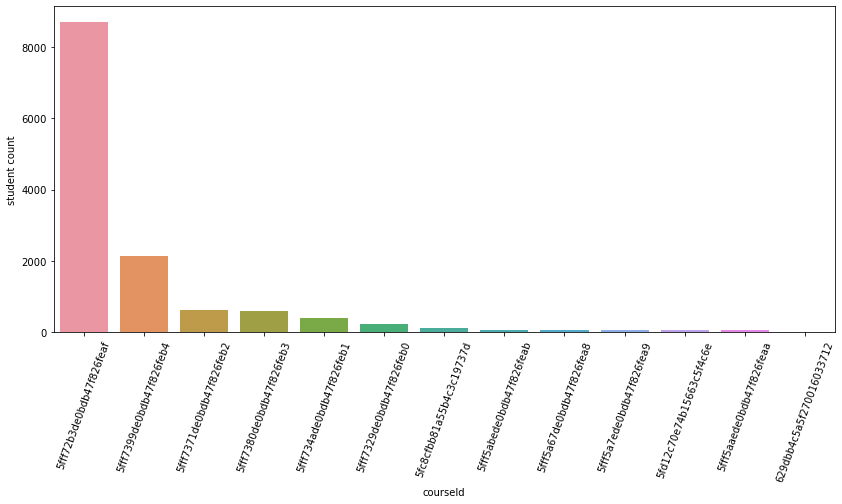

In [45]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=70)
sns.barplot(data=number_of_students,x='courseId',y='student count'
            ,order=number_of_students.sort_values('student count',ascending = False).courseId)
plt.show()

# Number of users per course

In [51]:
number_of_courses = enrolled_courses[['courseId','userId']].groupby(['userId']).agg(list)

In [53]:
number_of_courses = number_of_courses.reset_index()

In [54]:
number_of_courses['number of courses'] = number_of_courses['courseId'].apply(lambda x:len(set(x)))

In [59]:
number_of_courses[number_of_courses['number of courses']>1]

,userId,courseId,number of courses
31,601604c044b43c48f8a3a1b8,"[5fff734ade0bdb47f826feb1, 5fff7371de0bdb47f82...",2
45,601604c044b43c48f8a3a1c6,"[5fff72b3de0bdb47f826feaf, 5fff7371de0bdb47f82...",2
50,601604c044b43c48f8a3a1cb,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2
57,601604c044b43c48f8a3a1d2,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",3
69,601604c044b43c48f8a3a1de,"[5fff7371de0bdb47f826feb2, 5fff7380de0bdb47f82...",2
...,...,...,...
10904,61a5aa84b084830016832643,"[5fff7399de0bdb47f826feb4, 5fff7371de0bdb47f82...",2
11062,61be51aba132fe0016be0983,"[5fff7371de0bdb47f826feb2, 5fff734ade0bdb47f82...",2
11275,61cd5418d70c840016d370a4,"[5fff5aaede0bdb47f826feaa, 5fff5a67de0bdb47f82...",6
12505,6268ec130efdc00016cc89af,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2


In [60]:
number_of_courses[number_of_courses['number of courses']>5]

,userId,courseId,number of courses
89,601604c044b43c48f8a3a1f3,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
191,602e4bd458f23f05d209602f,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
214,603a1d9f88f8e80015827df3,"[5fff734ade0bdb47f826feb1, 5fff72b3de0bdb47f82...",6
233,603a32a988f8e80015827e32,"[5fff7329de0bdb47f826feb0, 5fff72b3de0bdb47f82...",6
257,603c9d866900f2001578a1ce,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
364,60704089a5a79c001505d24f,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",12
520,6082a59a3926fe29c8c7f1fd,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
539,6082a5aa3926fe29c8c7f223,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",13
2366,6082ab7e3926fe29c8c80069,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
4763,608cf4e9e697790015ee210d,"[nan, 5fff72b3de0bdb47f826feaf, 5fff7329de0bdb...",7


In [61]:
number_of_courses['number of courses'].value_counts()

1     12854
2        35
3        22
6        18
12        5
7         4
5         2
4         2
13        1
Name: number of courses, dtype: int64

C:\Users\alomo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number of courses', ylabel='count'>

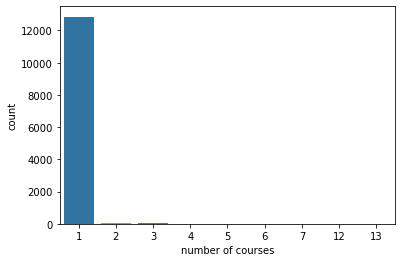

In [57]:
sns.countplot(number_of_courses['number of courses'])

In [42]:
number_of_courses[number_of_courses['courseId']>1] #just 91 students have taken more than 1 course

,courseId
userId,
601604c044b43c48f8a3a1b8,2
601604c044b43c48f8a3a1c6,2
601604c044b43c48f8a3a1cb,2
601604c044b43c48f8a3a1d2,3
601604c044b43c48f8a3a1de,2
...,...
61ace52cf77cd000167810fb,2
61be51aba132fe0016be0983,2
61cd5418d70c840016d370a4,6


# Recommender System

In [102]:
#enrolledcourses
lessons = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\lessons.csv")

In [103]:
lessons.head(10)

,_id,title
0,6012bdcecfe09249249f7e9c,Drawing And Labeling Of Farm Tools
1,6012bdcecfe09249249f7e9e,Types Of Insect And Part (Cockroach)
2,6012bdcecfe09249249f7ea0,Useful And Harmful Insect
3,6012bdcecfe09249249f7ea2,Controlling Harmful Insects
4,6012bdcecfe09249249f7ea4,Farmers Friend (Earthworm)
5,6012bdcecfe09249249f7ea8,Description Of Farmers Enemies
6,6012bdcecfe09249249f7eaa,Method Of Controlling Farmers Enemies
7,6012bdcecfe09249249f7ea6,Enemies Of Farmers (Rodent & Birds)
8,6012bdd3cfe09249249f7eac,Gathering And Carrying Tools
9,6012bdd3cfe09249249f7eb0,Maintenance Of Gathering And Carrying Tools


In [104]:
lessons['title'].nunique()

3486

In [105]:
lessons['_id'].nunique()

3737

In [106]:
len(lessons)

3737

In [4]:
#examresults
er = pd.read_csv("examresults.csv")

In [5]:
er.head()

,_id,status,userId,examId,timeSpent,results,score,numberOfCorrectAnswers,numberOfSkippedQuestions,numberOfWrongAnswers,percentage,remark,total,createdAt,updatedAt,__v
0,616ff267bae7580016355070,pending,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff267bae7580016355071""},""q...",30,1,0,0,1.0,You were Excellent.,30,2021-10-20T10:41:43.933Z,2021-10-20T10:41:43.933Z,0
1,616ff5d4bae758001635512e,pending,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff5d4bae758001635512f""},""q...",15,1,0,0,1.0,You were Excellent.,15,2021-10-20T10:56:20.281Z,2021-10-20T10:56:20.281Z,0
2,616ff65fbae7580016355143,marked,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff65fbae7580016355144""},""q...",15,1,0,0,1.0,You were Excellent.,15,2021-10-20T10:58:39.235Z,2021-10-20T10:58:39.235Z,0
3,617bdf23fc556a00169f1180,marked,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""617bdf23fc556a00169f1181""},""q...",150,5,0,0,1.0,You were Excellent.,150,2021-10-29T11:46:43.047Z,2021-10-29T11:46:43.047Z,0
4,617be0c1fc556a00169f1187,pending,6154838ed1e76e5ff85b8b1e,617ac528401e8643c8353b32,1030,"[{""_id"":{""$oid"":""617be0c1fc556a00169f1188""},""q...",60,2,0,0,1.0,You were Excellent.,60,2021-10-29T11:53:37.541Z,2021-10-29T14:27:01.774Z,0


In [6]:
len(er)

43

In [11]:
#favorites
fv = pd.read_csv("favorites.csv")

In [12]:
fv.head()

,_id,userId,courseId,subjectId,lessonId,termId,createdAt,updatedAt,__v
0,618f90aaa24eec00162a6186,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f018108087fe,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:14.911Z,2021-11-13T10:17:14.911Z,0
1,618f90aba24eec00162a6189,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f018108087fe,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:15.181Z,2021-11-13T10:17:15.181Z,0
2,618f90cfa24eec00162a61e8,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f01810808800,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:51.426Z,2021-11-13T10:17:51.426Z,0
3,618fca0ba24eec00162a7432,618c35cac07b8b0016b19bff,5fff7399de0bdb47f826feb4,60119d7b31c66a2ebd9eb526,6013b9d43ea6f018108089c4,5fc8d1b20fae0a06bc22db5c,2021-11-13T14:22:03.594Z,2021-11-13T14:22:03.594Z,0
4,6191cc65c80ef3001687e19b,615c62aa61c68f0016eb3918,5fff7399de0bdb47f826feb4,60119d1b31c66a2ebd9eb519,6013b8c03ea6f01810808820,5fc8d1b20fae0a06bc22db5c,2021-11-15T02:56:37.660Z,2021-11-15T02:56:37.660Z,0


In [13]:
len(fv)

87

In [14]:
#pastquestionprogresses
pqp = pd.read_csv("pastquestionprogresses.csv")

In [15]:
pqp.head()

,_id,__v
0,5ffc6dbaf5af02468c652fcf,0
1,5ffc6e05586b444810f3af9c,0
2,5ffc6ef6586b444810f3af9d,0
3,5ffc6f436dcc954a90957122,0
4,5ffc6f536dcc954a90957123,0


In [16]:
len(pqp)

3148

In [17]:
#pastquestionquizresults
pqqr = pd.read_csv("pastquestionquizresults.csv")

In [18]:
pqqr.head()

,_id,results,userId,classId,courseId,timeSpent,numberOfCorrectAnswers,numberOfWrongAnswers,numberOfSkippedQuestions,score,remark,__v
0,5ffd5889675630077832c703,"[{""_id"":{""$oid"":""5ffd5889675630077832c704""},""q...",5fd66fb678385d3c8098f880,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
1,5ffd5a546f091d409ceaa1b6,"[{""_id"":{""$oid"":""5ffd5a546f091d409ceaa1b7""},""q...",5ffd5a286f091d409ceaa19d,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
2,5ffd5b1c377e324d0c62f30f,"[{""_id"":{""$oid"":""5ffd5b1c377e324d0c62f310""},""q...",5ffd5ab5377e324d0c62f2f8,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
3,5ffd5b4146f4e821ac738b45,"[{""_id"":{""$oid"":""5ffd5b4146f4e821ac738b46""},""q...",5ffd5b2a46f4e821ac738b2c,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
4,5ffd5cae5be7fe038c19317f,"[{""_id"":{""$oid"":""5ffd5cae5be7fe038c193180""},""q...",5ffd5c6b5be7fe038c193166,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0


In [19]:
len(pqqr)

3242

In [66]:
#quizresults
qr = pd.read_csv("quizresults.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'quizresults.csv'

In [21]:
qr.head()

,_id,userId,classId,courseId,lessonId,subjectId,timeSpent,numberOfCorrectAnswers,numberOfWrongAnswers,numberOfSkippedQuestions,score,remark,createdAt,updatedAt,__v
0,5fc8fe4edc422b3a2cb7b606,5fd66fb678385d3c8098f880,5fc8d2a4b55ab52a40d75a54,5fc8cfbb81a55b4c3c19737d,5fd304b5a3181bf4ca54f89c,5fff5bab3fd2d54b08047c82,40,2.0,3.0,1.0,80.0,You can do better,2020-12-03T15:03:42.102Z,2020-12-03T15:03:42.102Z,0
1,5fcf72eb621bce30441384b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T12:34:51.646Z,2020-12-08T12:34:51.646Z,0
2,5fcf792a7cd91b0eb41249fb,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:01:30.955Z,2020-12-08T13:01:30.955Z,0
3,5fcf7b08df08090a90217528,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:09:28.418Z,2020-12-08T13:09:28.418Z,0
4,5fcf7b15e0027a1d54047779,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:09:41.642Z,2020-12-08T13:09:41.642Z,0


In [22]:
len(qr)

818

In [23]:
#recentactivities
rac = pd.read_csv("recentactivities.csv")

In [24]:
rac.head()

,_id,lessonId,type,userId,createdAt,updatedAt,__v
0,609a3909f3e4905f0001f3de,6012d1b0cfe09249249f8954,lesson,6096464f42cd50554895e250,2021-05-11T07:58:01.630Z,2021-05-11T07:58:01.630Z,0
1,609a3a8bf3e4905f0001f3e0,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:04:27.541Z,2021-05-11T08:04:27.541Z,0
2,609a4259f3e4905f0001f3e2,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:37:45.403Z,2021-05-11T08:37:45.403Z,0
3,609a42dff3e4905f0001f3e5,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.882Z,2021-05-11T08:39:59.882Z,0
4,609a42dff3e4905f0001f3e6,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.896Z,2021-05-11T08:39:59.896Z,0


In [25]:
len(rac)

21709

In [27]:
rac['_id'].nunique()

21709

In [29]:
#resumeplayings
rp = pd.read_csv("resumeplayings.csv")

In [30]:
rp.head()

,_id,userId,courseId,subjectId,lessonId,termId,createdAt,updatedAt,__v
0,61784b4afd921f00161608f7,60e75b42df20f743607ab52e,5fff72b3de0bdb47f826feaf,60119a4131c66a2ebd9eb4d0,6012d1b0cfe09249249f8954,5fc8d1b20fae0a06bc22db5c,2021-10-26T18:39:06.060Z,2021-10-26T18:39:06.060Z,0
1,617c61f2b736b70016b4427f,617c5a2db736b70016b44151,5fff72b3de0bdb47f826feaf,60119a5d31c66a2ebd9eb4d4,6012d2bccfe09249249f8a12,5fc8d1b20fae0a06bc22db5c,2021-10-29T21:04:50.927Z,2021-10-29T21:04:50.927Z,0
2,617c64d4b736b70016b44314,617c5a2db736b70016b44151,5fff72b3de0bdb47f826feaf,60119a7431c66a2ebd9eb4d7,6012d31fcfe09249249f8a9c,5fc8d1b20fae0a06bc22db5c,2021-10-29T21:17:08.460Z,2021-10-29T21:17:08.460Z,0
3,618037a51a5eec0016682922,6162e16577c6310016e7f261,5fff734ade0bdb47f826feb1,60119ba131c66a2ebd9eb4ee,6012d7abcfe09249249f8ebe,600048197cabf80f88f61736,2021-11-01T18:53:25.139Z,2021-11-01T18:53:25.139Z,0
4,6181090aaf49b300162ba557,615618c778a374001601f15d,5fff7371de0bdb47f826feb2,60119c2931c66a2ebd9eb4fe,6012d94ecfe09249249f9222,5fc8d1b20fae0a06bc22db5c,2021-11-02T09:46:50.722Z,2021-11-02T09:46:50.722Z,0


In [31]:
len(rp)

480

In [32]:
#subjectprogresses
subp = pd.read_csv("subjectprogresses.csv")

In [33]:
subp.head()

,_id,classId,lessonId,subjectId,courseId,userId,createdAt,updatedAt,__v
0,6030061fe09d7f0e74107668,60224d726460b71eb90581a7,6012bdcecfe09249249f7e9c,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,60224d726460b71eb90581a5,2021-02-19T18:40:31.010Z,2021-02-19T18:40:31.010Z,0
1,60300641e09d7f0e7410766b,NaN,6012cec2cfe09249249f88fe,60119a3331c66a2ebd9eb4cf,5fff72b3de0bdb47f826feaf,6016567a31c66a2ebd9eb56a,2021-02-19T18:41:05.669Z,2021-02-19T18:41:05.669Z,0
2,6030505769746d34c8265aa0,60224d726460b71eb90581a7,6012bdd3cfe09249249f7eac,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,60224d726460b71eb90581a5,2021-02-19T23:57:11.213Z,2021-02-19T23:57:11.213Z,0
3,6030511669746d34c8265aa3,NaN,6012d2abcfe09249249f89f4,60119a5531c66a2ebd9eb4d3,5fff72b3de0bdb47f826feaf,6016567a31c66a2ebd9eb56a,2021-02-20T00:00:22.871Z,2021-02-20T00:00:22.871Z,0
4,6030e91f4ad46f1ec0a932a5,NaN,6012bdcecfe09249249f7e9c,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,602bd4ae29299e2bbcd9f9e4,2021-02-20T10:49:03.517Z,2021-02-20T10:49:03.517Z,0


In [34]:
len(subp)

13989